## Comparing methods of calculating weighted regional and global means

### Import packages

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import esmlab

### Load in some test data

In [3]:
scr_dir = '/glade/scratch/kdagon/archive/'
case_name = 'hydro_ensemble_default_params'
file_path = scr_dir+case_name+'/lnd/hist/'
print(file_path)

'/glade/scratch/kdagon/archive/hydro_ensemble_default_params/lnd/hist/'

Specify model year to read in

In [7]:
model_yr = 30

In [9]:
fils_in = xr.open_mfdataset(file_path+'*.clm2.h0.00'+str(model_yr)+'*.nc', combine='by_coords')

In [10]:
fils_in

<xarray.Dataset>
Dimensions:                 (cft: 2, glc_nec: 10, hist_interval: 2, lat: 46, levdcmp: 1, levgrnd: 25, levlak: 10, levsoi: 20, lon: 72, ltype: 9, natpft: 15, nvegwcs: 4, time: 12)
Coordinates:
  * lon                     (lon) float32 0.0 5.0 10.0 ... 345.0 350.0 355.0
  * levlak                  (levlak) float32 0.05 0.6 2.1 ... 25.6 34.325 44.775
  * levdcmp                 (levdcmp) float32 1.0
  * lat                     (lat) float32 -90.0 -86.0 -82.0 ... 82.0 86.0 90.0
  * levgrnd                 (levgrnd) float32 0.01 0.04 ... 28.870724 41.998436
  * time                    (time) object 0030-02-01 00:00:00 ... 0031-01-01 00:00:00
Dimensions without coordinates: cft, glc_nec, hist_interval, levsoi, ltype, natpft, nvegwcs
Data variables:
    mcdate                  (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec                   (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur                   (time) int32 dask.array<chunksiz

### Pull out a specific output variable

In [11]:
TSA = fils_in.TSA # this is now a DataArray
TSA

<xarray.DataArray 'TSA' (time: 12, lat: 46, lon: 72)>
dask.array<concatenate, shape=(12, 46, 72), dtype=float32, chunksize=(1, 46, 72), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
  * time     (time) object 0030-02-01 00:00:00 ... 0031-01-01 00:00:00
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

### Gridcell area and landfrac info (first time index)

In [17]:
area = fils_in.area[0]
landfrac = fils_in.landfrac[0]
landfrac

<xarray.DataArray 'landfrac' (lat: 46, lon: 72)>
dask.array<getitem, shape=(46, 72), dtype=float32, chunksize=(46, 72), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
    time     object 0030-02-01 00:00:00
Attributes:
    long_name:  land fraction

### Calculate area weights

In [20]:
arwt = area * landfrac

In [33]:
# This doesn't work - how to reassign long_name to arwt?
#arwt.long_name = 'grid cell areas multiplied by landfrac'

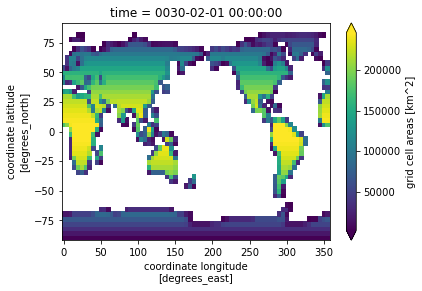

In [30]:
arwt.plot(robust=True);

Normalize arwt: 2 methods!

In [24]:
arwt_norm_sum = arwt/arwt.sum()

In [25]:
arwt_norm_max = arwt/arwt.max()

In [27]:
arwt_norm_max

<xarray.DataArray (lat: 46, lon: 72)>
dask.array<truediv, shape=(46, 72), dtype=float32, chunksize=(46, 72), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
    time     object 0030-02-01 00:00:00
Attributes:
    long_name:  grid cell areas
    units:      km^2

## TO DO: calc area weights (arwt) with 2 different normalizations, esmlab weighted means function, cos(latitude) weighting, other NCL/tutorial methods?
### Test global and regional both methods